# Este notebook utiliza uma dense neoron network to classify books 


Este notebook utiliza o data set produzido no notebook "Phrase2VecPortuguese" para classificar livros a partir de seus dados bibliogŕaficos. O dataset foi gerado a partir da coleta de dados de diverssas bibliotecas e contém como label o número CDD e a descrição biblografica previamente vetorizada. 

Utilizando tensorflow para cria um rede neural densa o modelo criado tem como objetivo a partir dos dados bibligraficos calcular o primeiro nível do CDD 000 - 90.  A pesar do método de regreção ninear talves não seja  o método pois o CDD não se trata de uma escala numérica (ver descrição abixo), sua utlização pode trazer bons resultados. 




## Classificação CDD 

A Classificação Decimal de Dewey (em inglês: Dewey Decimal Classification; DDC ou CDD) é um sistema de classificação documentária desenvolvido pelo bibliotecário americano Melvil Dewey (1851–1931).
a Classificação CDD é amplamente utilizada em bibliotecas e seu proposito é reunir e organizar para para o docuemnto ser "achavel". 
https://pt.wikipedia.org/wiki/Classifica%C3%A7%C3%A3o_decimal_de_Dewey

A CDD trabalha em de forma hierarquica, onde se pode aprofudar a classificação seguinto temas e sub temas, sendo o primeito nível apresenftado seguir: 
000 Generalidades
100 Filosofia
200 Religião
300 Ciências sociais
400 Línguas
500 Ciências puras
600 Ciências aplicadas
700 Artes
800 Literatura
900 História e geografia

Para realizar um software capaz de prever a CDD de um livro com base no titulo, autor e assunto. Por meio de Spiders nos juntamso em um dataset contendo a descrição dos livros e sua respectiva classificação nas base da dados da rede de bibliotecca de sâo paulo : http://bibliotecacircula.prefeitura.sp.gov.br/pesquisa/ ' na bibloteca Nacional   http://acervo.bn.br/sophia_web/index.html. 



# Primeiro passo - Carregar o dataset contendo cdd, descrição bibliografica veorizada


In [1]:
import pandas as pd
import tensorflow as tf

pathclas = '/home/desenvolvimento/python/dataset/producao/classificacaioVector_v.csv'
dataclas = pd.read_csv( pathclas);


import numpy as np


def getArrayFrom( strteste, fixedsize ):
    original = np.fromstring(strteste, dtype=float, sep=' ')
    size = len(original)
    if size < fixedsize:
        zeros= np.zeros(fixedsize- size) 
        original = np.concatenate((original, zeros), axis=0)
        
    elif size > fixedsize:
        original = original[0:fixedsize]
        
        
    return original    
dataclas.shape  # DataFrame (45962, 2) | numpy.int64 str  
matrixSize = 200 * 50 # 220 words with 50 dimentions  
sizedataset= len(dataclas)

print('Dataset Size X vector size ' , sizedataset, 'x ',  matrixSize)

labels = np.zeros(sizedataset)
wordvects = np.zeros((sizedataset, matrixSize), dtype=float) 


#for i in range(sizedataset):
for i in range(sizedataset):    
    label =dataclas.iloc[i][0]
    wordvec =dataclas.iloc[i][1]
    if label < 1000:
        labels[i] =int(label /100)
        vecttemp =  getArrayFrom(wordvec, matrixSize )
        wordvects[i]= vecttemp
        
        
def getbachTrain(size):
    index = np.random.choice(sizedataset, size)
    xbach = wordvec[index]
    ybach = labels[index]
    return xbach, ybach 





Dataset Size X vector size  45962 x  10000


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
labels_1_hot = label_encoder.fit_transform(labels)
# todos os labels em  1_hot 45962

onehot_encoder = OneHotEncoder(sparse=False)
labels_1_hot = labels_1_hot.reshape(len(labels_1_hot), 1)
# (45962,) -> (45962,1)
onehot_encoded = onehot_encoder.fit_transform(labels_1_hot)
#(45962, 10)



/home/leo/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
print(onehot_encoded.shape)
print(onehot_encoded[0])
print(onehot_encoded[2])



(45962, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [4]:
sizedataset = len(labels) 
indext = np.random.rand(sizedataset) < 0.9

xtrain = wordvects[indext]
ytrain = onehot_encoded[indext]

xtest = wordvects[~indext]
yteste = onehot_encoded[~indext]




                   




In [5]:
sizetrain = len(ytrain) 
sizetest = len(yteste) 

def getbachTrain(size):
    index = np.random.choice(sizetrain, size)
    xbach = xtrain[index]
    ybach = ytrain[index]
    return xbach, ybach 


def getbachTest(size):
    index = np.random.choice(sizetest, size)
    xbach = xtest[index]
    ybach = yteste[index]
    return xbach, ybach 


xbach, ybach = getbachTest(5)



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
(5, 10000)
(5, 10)


In [6]:

print('Distribuição das classificações do nosso dataset' )

import matplotlib.pyplot as plt
plt.hist(labels)
plt.show()


Distribuição das classificações do nosso dataset


<Figure size 640x480 with 1 Axes>

##Arquiterura da solução  
    1. Input
    2. Hiden layer com duas camadas (w1 e w2)
    3. Camada fincal WF
    4. Função custo distância vetorial  
    


<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1547672259/3_qwv5gr.png">







In [7]:
# meta parametros para nossa rede neural 


optimizerrate = 0.01


# Network Parameters
num_input = 10000 # -> 200 palavras X  50 dimensões por palavra 
matrixSize = 10000
n_hidden_1 = 2000 # 2000 dimensão da primeira camada 
n_hidden_2 = 200 # 200 dimensão da primeira camada 
num_classes = 10 # as 10 classes principais do CDD 0-9
print(sizedataset)
ratelearning = 0.01
stddev=0.1 # utilizado para inicializar os pesos das camadas de neuronio

45962


# Monta o modelo na rede neural do Tensor flow

##  Vamos utilizar uma feed forward neural network


    


<img src="tensor2.png"  width="500px" height="200px">







In [18]:
def getTensorModel():

    import tensorflow as tf
    # num_input 10000  -> 200 palavras X  50 dimensões por palavra 
    X = tf.placeholder(tf.dtypes.float32, [None, num_input])
    Y = tf.placeholder(tf.dtypes.float32, [None, num_classes]) #  (rows, columns).


    #  Primeira camada 

    w1 = tf.Variable(tf.random_normal([n_hidden_1 , num_input], stddev=stddev,
                                      dtype=tf.dtypes.float32 ),
                            name="w1" , dtype=tf.dtypes.float32 )
    b1 = tf.Variable(tf.zeros([n_hidden_1, 1]), name='b1', dtype=tf.dtypes.float32)
    y1 = tf.nn.relu(tf.add(tf.matmul(w1, tf.transpose(X)), b1), name='y1')

    #  Segunda  camada 
    w2 = tf.Variable(tf.random_normal([n_hidden_2 , n_hidden_1], stddev=stddev),
                            name="w2" , dtype=tf.dtypes.float32 )
    b2 = tf.Variable(tf.zeros([n_hidden_2, 1]), name='b2', dtype=tf.dtypes.float32)
    y2 = tf.nn.relu(tf.add(tf.matmul(w2, y1), b2), name='y2')



    #  Ultima  camada
    wf = tf.Variable(tf.random_normal([num_classes , n_hidden_2], stddev=stddev),
                            name="wf" , dtype=tf.dtypes.float32 )

    bf = tf.Variable(tf.zeros([num_classes, 1]), name='bf', dtype=tf.dtypes.float32)

    y_3 = tf.nn.relu(tf.add(tf.matmul(wf, y2), bf, name="y_3"))
    media  =tf.reduce_sum(tf.transpose(y_3), 1) +1  #
    
    y_f= tf.divide(y_3, media) 
    
    
    #  camade de saida (out put layer)
    
    trueLabels=tf.argmax(Y, 1)
    predictionsLabels=tf.argmax(tf.transpose(y_f), 1)
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits= tf.transpose(y_f) ,
                                                              labels= Y)
           
    cost = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=ratelearning).minimize(cost)
    my_acc = tf.reduce_mean(tf.cast(tf.equal(trueLabels, predictionsLabels), tf.float32))

    
    print('ratelearning', ratelearning) 
    
    
    return  X, Y, y_f ,  cross_entropy , cost , optimizer, y_3, media, trueLabels, predictionsLabels, my_acc
    



In [19]:
ratelearning = 0.0008


X, Y, y_f,  cross_entropy , cost , optimizer, y_3, media, trueLabels, predictionsLabels, my_acc = getTensorModel()    


session = tf.Session()
session.run(tf.global_variables_initializer())


bachsize = 800
ntraining = 3000 
acuracy = 0.0
measureRate = 50 # define os pontos p coleta de erro 
nTraningmeasure = int(ntraining/measureRate )  
print(nTraningmeasure) 


trainCost = np.zeros(nTraningmeasure)
trainErros = np.zeros(nTraningmeasure)
interations = np.zeros(nTraningmeasure)

    
print( n_hidden_1 ,'X', n_hidden_2, optimizerrate ,  bachsize , ntraining,  '=' ) 
indicemen = 0

for i in range(ntraining):
    xbach, ybach  = getbachTrain(bachsize)
    feed_dict_train = {X: xbach,   Y: ybach}

    
    result = session.run(optimizer, feed_dict=feed_dict_train)
    
    
    if i % measureRate  == 0:
        
        rcost = session.run(cost, feed_dict=feed_dict_train)
        acuracy = session.run(my_acc, feed_dict=feed_dict_train)
        if indicemen < len(trainErros):
            trainErros[indicemen] = acuracy
            trainCost[indicemen] = rcost
            interations[indicemen] = i
            #print(i, 'cost ',rcost, 'predictions ', acuracy  )
            
        indicemen = indicemen + 1
        


ratelearning 0.0008
60
2000 X 200 0.01 800 3000 =


In [ ]:
print()


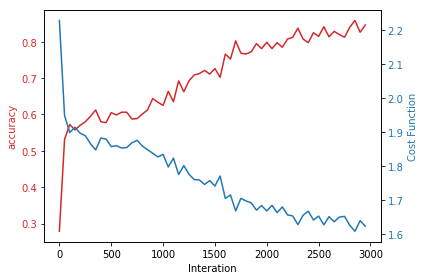

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Interation')
ax1.set_ylabel('accuracy', color=color)
ax1.plot(interations, trainErros, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cost Function', color=color)  # we already handled the x-label with ax1
ax2.plot(interations, trainCost, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [17]:

xbach, ybach  = getbachTest(1000)
feed_dict_train = {X: xbach,   Y: ybach}


result = session.run(my_acc, feed_dict=feed_dict_train)
print('Dataset Test accuracy  ', result  )


Dataset Test accuracy   0.6820000171661377


## Resultado :
 Training set : 0.82625002 
 Test set : 0.6820000171661377
 
 
**Vamos salvar para utiolizar a network treinada : 






In [16]:
saver = tf.train.Saver()
save_path = saver.save(session, "DenseNNCDD_Classificator.ckpt")
print("Model saved in path: %s" % save_path)




Model saved in path: DenseNNCDD_Classificator.ckpt
